In [1]:
from scipy import stats
from scipy.stats import pearsonr, kendalltau

srcc = stats.spearmanr( [0.6480761, 0.62233955, 0.6661059, 0.631339, 0.6192408, 0.641552, 0.6423639, 0.7225227, 0.65772206, 0.63077545, 0.54655486  , 0.6763791, 0.62823856, 0.63159883, 0.62590545, 0.65006614, 0.6068853, 0.63621056, 0.5723472, 0.6442189, 0.62065214, 0.67560524, 0.6549503, 0.61165047], [0.062, 0.032, 0.029, 0.028, 0.027, 0.104, 0.028, 0.006, 0.033, 0.088, 0.052, 0.014, 0.029, 0.032, 0.022, 0.0, 0.012, 0.04, 0.051, 0.003, 0.032, 0.031, 0.019, 0.042])
srcc0 = pearsonr( [0.6480761, 0.62233955, 0.6661059, 0.631339, 0.6192408, 0.641552, 0.6423639, 0.7225227, 0.65772206, 0.63077545, 0.54655486  , 0.6763791, 0.62823856, 0.63159883, 0.62590545, 0.65006614, 0.6068853, 0.63621056, 0.5723472, 0.6442189, 0.62065214, 0.67560524, 0.6549503, 0.61165047], [0.062, 0.032, 0.029, 0.028, 0.027, 0.104, 0.028, 0.006, 0.033, 0.088, 0.052, 0.014, 0.029, 0.032, 0.022, 0.0, 0.012, 0.04, 0.051, 0.003, 0.032, 0.031, 0.019, 0.042])
srcc1 = kendalltau( [0.6480761, 0.62233955, 0.6661059, 0.631339, 0.6192408, 0.641552, 0.6423639, 0.7225227, 0.65772206, 0.63077545, 0.54655486  , 0.6763791, 0.62823856, 0.63159883, 0.62590545, 0.65006614, 0.6068853, 0.63621056, 0.5723472, 0.6442189, 0.62065214, 0.67560524, 0.6549503, 0.61165047], [0.062, 0.032, 0.029, 0.028, 0.027, 0.104, 0.028, 0.006, 0.033, 0.088, 0.052, 0.014, 0.029, 0.032, 0.022, 0.0, 0.012, 0.04, 0.051, 0.003, 0.032, 0.031, 0.019, 0.042])

srcc[0],srcc0[0],srcc1[0]

(-0.3369615411989142, -0.31079259594045033, -0.23766989273624328)

In [2]:
import torch
print(torch.cuda.get_device_name(0))
print(torch.cuda.is_available())


NVIDIA GeForce GTX 1050
True


In [3]:
%cd ..


d:\quality_assessment\knowledge_distillation\cvr-iqa\CVRKD-IQA


In [4]:
from test_DistillationIQA_single import DistillationIQASolver


obj_org = DistillationIQASolver(net_mode="org",student_address='./model_zoo/NAR_student_cross_dataset.pth')

normal mode...
>>>>>  ./model_zoo/NAR_student_cross_dataset.pth


In [5]:
obj_stackV1 = DistillationIQASolver(net_mode="stackingV1",student_address='./model_zoo/stacking_ep98_saved_student_model.pth')

stacking modeV1...
>>>>>  ./model_zoo/stacking_ep98_saved_student_model.pth


In [4]:
from test_DistillationIQA_single import DistillationIQASolver

obj_stackV2 = DistillationIQASolver(net_mode="stackingV2",student_address='./model_zoo/stackingV2-ep70.pth')

stacking modeV2(combined)...
>>>>>  ./model_zoo/stackingV2-ep70.pth


In [7]:
obj_4loss = DistillationIQASolver(net_mode="stackingV2",student_address='./model_zoo/4loss_ep+26_5.pth')

stacking modeV2(combined)...
>>>>>  ./model_zoo/4loss_ep+26_5.pth


# dst:

In [11]:
import random , glob

def get_random_HR_images():
    all_images = glob.glob('D:\quality_assessment\knowledge_distillation\cvr-iqa\CVRKD-IQA\dataset\DIV2K_ref/val_HR/*')
    return random.sample(all_images, 1)[0]


get_random_HR_images()

'D:\\quality_assessment\\knowledge_distillation\\cvr-iqa\\CVRKD-IQA\\dataset\\DIV2K_ref/val_HR\\0860.png'

all imgs


In [5]:
def calculate_std(data):
    if len(data) == 0:
        return 0
    mean = sum(data) / len(data)
    variance = sum((x - mean) ** 2 for x in data) / len(data)
    std = variance ** 0.5
    return std



calculate_std([11,11,11,11,11,11,11,10])

0.33071891388307384

In [6]:
import glob

import natsort



all_clive_images = glob.glob("dataset/LIVEC/images/*.*")
all_clive_images = natsort.natsorted(all_clive_images)
len(all_clive_images)
all_clive_images[708],all_clive_images[1001],all_clive_images[33],all_clive_images[321],all_clive_images[506]


('dataset/LIVEC/images\\711.JPG',
 'dataset/LIVEC/images\\1004.JPG',
 'dataset/LIVEC/images\\36.bmp',
 'dataset/LIVEC/images\\324.bmp',
 'dataset/LIVEC/images\\509.bmp')

In [14]:
li = []

for i in range(10):
    li.append(obj_stackV2.cvr_on_single_image(all_clive_images[764] ,get_random_HR_images()))

calculate_std(li)


0.26938919165411856

In [36]:
import random
import string
from tqdm import tqdm


def generate_random_filename(num,extension=".txt"):
    letters = string.ascii_lowercase
    random_name = "".join(random.choice(letters) for i in range(8))
    return str(num)+"_"+random_name + extension


for i in range(2):
    random_filename = generate_random_filename(i)
    with open("S18_variance_test_on_clive/_CLIVE_TEST/"+random_filename, 'w') as file:
        for im in tqdm(all_clive_images):
            sc = obj_stackV2.cvr_on_single_image(im ,get_random_HR_images())
            file.write(f"{sc:.3f} {im}\n")
            



100%|██████████| 1162/1162 [10:15<00:00,  1.89it/s]


In [13]:
import scipy.io
import numpy as np

# Load the .mat file into a list
mat_contents = scipy.io.loadmat('dataset/LIVEC/Data/AllStdDev_release.mat')
std_clive = mat_contents['AllStdDev_release'][0][7:1169]
len(std_clive) ,std_clive




mat_contents = scipy.io.loadmat('dataset/LIVEC/Data/AllMOS_release.mat')
mos_clive = mat_contents['AllMOS_release'][0][7:1169]
len(mos_clive) ,mos_clive
# mat_contents

(1162,
 array([32.56107532, 66.35954917, 44.69498452, ..., 62.66171188,
        87.06559249, 72.75387093]))

In [12]:
import os

# Directory containing the txt files
directory = "S18_variance_test_on_clive/_CLIVE_TEST"

# List to store the names of txt files
txt_files = []

# Iterate over the files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        txt_files.append(filename)

# Print the list of txt files
print(len(txt_files))
# txt_files

txt_files


52


['0_mtnabftu.txt',
 '0_stvksxij.txt',
 '10_monoirrk.txt',
 '11_fkvrzkay.txt',
 '12_ofleemrb.txt',
 '13_onxfkzat.txt',
 '14_cfnvhyvv.txt',
 '15_pakxpycc.txt',
 '16_qygzqkhk.txt',
 '17_yesssugi.txt',
 '18_xanoyrhs.txt',
 '19_mzzklxft.txt',
 '1_jslgeqer.txt',
 '1_ldargzrh.txt',
 '20_uhnipmlm.txt',
 '21_dbptpqvj.txt',
 '22_nharlneu.txt',
 '23_pbhdzgfd.txt',
 '24_abjzsrqx.txt',
 '25_jdptyhdz.txt',
 '26_axvvtzjt.txt',
 '27_mfjvgduy.txt',
 '28_jjhnefar.txt',
 '29_btxsqgyh.txt',
 '2_hlompzaj.txt',
 '30_snwrdtlj.txt',
 '31_yrgdzmai.txt',
 '32_ioxgoeyb.txt',
 '33_sfjxllyp.txt',
 '34_pyarnbeu.txt',
 '35_wcduuamd.txt',
 '36_oqbpnjfb.txt',
 '37_mvoejpti.txt',
 '38_vrjztwxy.txt',
 '39_ykgkricg.txt',
 '3_uwfdbxnf.txt',
 '40_eebigofz.txt',
 '41_bnrudirg.txt',
 '42_hqctkkyw.txt',
 '43_gixjdbwl.txt',
 '44_zmdcblle.txt',
 '45_mjfdegll.txt',
 '46_jjieunja.txt',
 '47_knzquugd.txt',
 '48_jaucjwgq.txt',
 '49_begmmmlr.txt',
 '4_raphsdob.txt',
 '5_kgmrryab.txt',
 '6_ddtfplzn.txt',
 '7_tfeupitv.txt',
 '8_qogxor

In [14]:
def calculate_mean(lst):
    return sum(lst) / len(lst)


In [15]:
# Directory containing the txt files
directory = "S18_variance_test_on_clive/_CLIVE_TEST"
from tqdm import tqdm
# List to store the first line values

all_stds = []
all_means = []
# Iterate over the txt files
for i in tqdm(range(1162)):
    first_line_values = []

    for filename in txt_files:
        with open(os.path.join(directory, filename), 'r') as file:
            for j in range(i):
                file.readline()
            first_line = file.readline().strip()
            if first_line:
                value = first_line.split()[0]
                first_line_values.append(float(value))

    all_stds.append(calculate_std(first_line_values))
    all_means.append(calculate_mean(first_line_values))
# Print the list of first line values







100%|██████████| 1162/1162 [00:28<00:00, 41.22it/s]


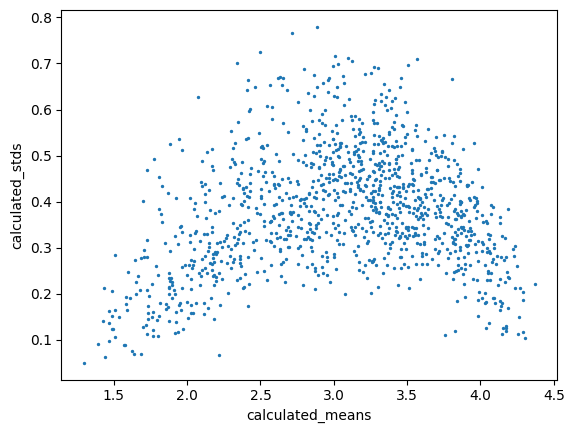

0.16930981151171565


In [25]:
# Normalize the lists
# moss_normalized = [(x - min(moss)) / (max(moss) - min(moss)) for x in moss]
# stdd_normalized = [(x - min(stdd)) / (max(stdd) - min(stdd)) for x in stdd]
import matplotlib.pyplot as plt

# all_stds , all_means , mos_clive , std_clive

# Plot scatter plot
plt.scatter(all_means, all_stds , s=2)
plt.xlabel('calculated_means')
plt.ylabel('calculated_stds')
plt.show()

# Compute correlation
correlation, _ = pearsonr(all_means, all_stds)
print(correlation)


In [6]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assuming `all_stds` is the list of standard deviations calculated earlier
# and `file_contents` is the list of MOS standard deviations from the txt file
# Normalize the lists
file_contents1 = [(x - min(file_contents)) / (max(file_contents) - min(file_contents)) for x in file_contents]
all_stds1 = [(x - min(all_stds)) / (max(all_stds) - min(all_stds)) for x in all_stds]

# Plot scatter plot
plt.scatter(file_contents1, all_stds1, s= 2)
plt.xlabel('MOS')
plt.ylabel('Calculated Standard Deviations')
plt.title('Scatter Plot of MOS vs Calculated Standard Deviations')
plt.show()

# Compute correlation
correlation, _ = pearsonr(file_contents1, all_stds1)
print(f'Correlation between MOS and Calculated Standard Deviations: {correlation}')
# Plot scatter plot with small points
# plt.scatter(file_contents1, all_stds1, s=10)  # s parameter sets the size of the points
# plt.xlabel('MOS Standard Deviations')
# plt.ylabel('Calculated Standard Deviations')
# plt.title('Scatter Plot of MOS vs Calculated Standard Deviations')
# plt.show()



TypeError: unsupported operand type(s) for -: 'str' and 'str'

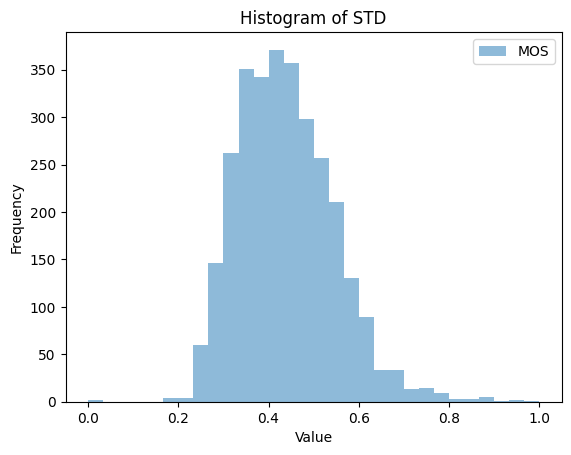

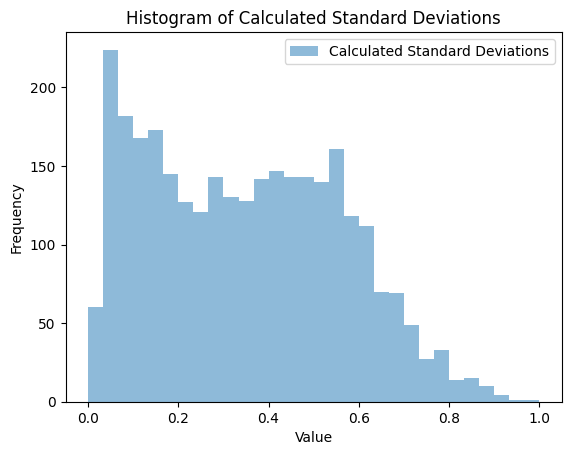

In [16]:
# Plot histograms of the two lists

# Plot histogram for file_contents1
plt.hist(file_contents1, bins=30, alpha=0.5, label='MOS')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of STD')
plt.legend()
plt.show()

# Plot histogram for all_stds1
plt.hist(all_stds1, bins=30, alpha=0.5, label='Calculated Standard Deviations')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Calculated Standard Deviations')
plt.legend()
plt.show()
